## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID', 'Mouse ID'])
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mouse_data['Mouse ID'].value_counts()

g989    13
k210    10
j913    10
m601    10
c264    10
        ..
n482     1
o848     1
v199     1
x336     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate = mouse_data.loc[(mouse_data['Mouse ID'] == mouse_data['Mouse Data'] &
                           #mouse_data['Timepoint'] == mouse_data['Timepoint'])]
duplicate = mouse_data[mouse_data.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_data.loc[(mouse_data['Mouse ID']=='g989')]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_data.set_index('Mouse ID')
mouse_data = mouse_data.drop('g989')

In [6]:
mouse_data.reset_index(level=['Mouse ID'], inplace = True)


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_data['Mouse ID'].value_counts()

s710    10
k894    10
o562    10
i635    10
w914    10
        ..
h428     1
f932     1
l872     1
o848     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gb = mouse_data.groupby('Drug Regimen')
mean = regimen_gb.mean()
mean = mean[['Tumor Volume (mm3)']]
mean = mean.rename(columns={'Tumor Volume (mm3)': "Mean"})

median = regimen_gb.median()
median = median[['Tumor Volume (mm3)']]
median = median.rename(columns={'Tumor Volume (mm3)': "Median"})
merge1 = pd.merge(mean, median, how='left', on= 'Drug Regimen')

variance = regimen_gb.var()
variance = variance[['Tumor Volume (mm3)']]
variance = variance.rename(columns={'Tumor Volume (mm3)': "Variance"})
merge2 = pd.merge(merge1, variance, how='left', on= 'Drug Regimen')

std = regimen_gb.std()
std = std[['Tumor Volume (mm3)']]
std = std.rename(columns={'Tumor Volume (mm3)': "St Dev"})
merge3= pd.merge(merge2, std, how='left', on= 'Drug Regimen')

sem = regimen_gb.sem()
sem = sem[['Tumor Volume (mm3)']]
sem = sem.rename(columns={'Tumor Volume (mm3)': "SEM"})
summary_df = pd.merge(merge3, sem, how='left', on= 'Drug Regimen')
summary_df


# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

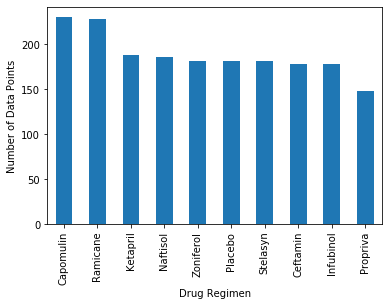

In [31]:
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study using pandas.
bar_count = regimen_gb.count().sort_values(by='Mouse ID',ascending=False)
bar_count['Mouse ID'].plot(kind='bar')
plt.ylabel('Number of Data Points')
plt.show()

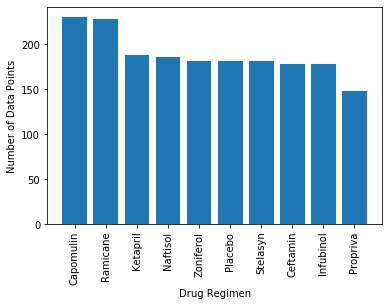

In [34]:
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study using pyplot.
bar_count = bar_count.reset_index()
plt.bar(bar_count['Drug Regimen'], bar_count['Mouse ID'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.show()

## Pie Plots

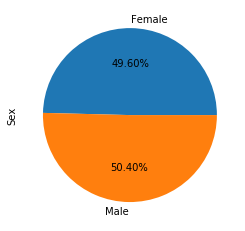

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
last_mouse_df = mouse_data.groupby('Mouse ID').last().reset_index()
sex_count_df = last_mouse_df.groupby('Sex').count()
sex_count_df['Mouse ID'].plot.pie(autopct='%1.2f%%')
plt.ylabel('Sex')
plt.show()

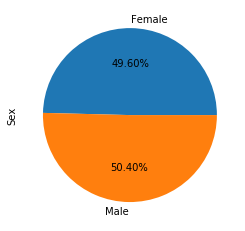

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
data = sex_count_df['Mouse ID']
plt.pie(data, labels=labels, autopct='%1.2f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the 
#most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
last_cap_df = last_mouse_df.loc[last_mouse_df['Drug Regimen']=='Capomulin']
cap_tumor = last_cap_df['Tumor Volume (mm3)']
quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
cap_out_df = last_cap_df.loc[(last_cap_df['Tumor Volume (mm3)'] > upper_bound) |
                            (last_cap_df['Tumor Volume (mm3)'] < lower_bound)]
cap_out_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [15]:
last_ram_df = last_mouse_df.loc[last_mouse_df['Drug Regimen']=='Ramicane']
ram_tumor = last_ram_df['Tumor Volume (mm3)']
quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
ram_out_df = last_ram_df.loc[(last_ram_df['Tumor Volume (mm3)'] > upper_bound) |
                            (last_ram_df['Tumor Volume (mm3)'] < lower_bound)]
ram_out_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [16]:
last_inf_df = last_mouse_df.loc[last_mouse_df['Drug Regimen']=='Infubinol']
inf_tumor = last_inf_df['Tumor Volume (mm3)']
quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
inf_out_df = last_inf_df.loc[(last_inf_df['Tumor Volume (mm3)'] > upper_bound) |
                            (last_inf_df['Tumor Volume (mm3)'] < lower_bound)]
inf_out_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
31,c326,Infubinol,Female,18,25,5,36.321346,0


In [17]:
last_cef_df = last_mouse_df.loc[last_mouse_df['Drug Regimen']=='Ceftamin']
cef_tumor = last_cef_df['Tumor Volume (mm3)']
quartiles = cef_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
cef_out_df = last_cef_df.loc[(last_cef_df['Tumor Volume (mm3)'] > upper_bound) |
                            (last_cef_df['Tumor Volume (mm3)'] < lower_bound)]
cef_out_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


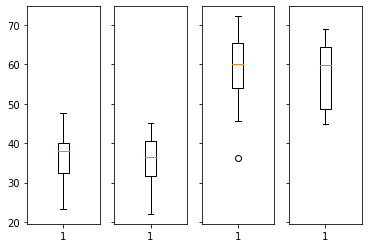

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, axs = plt.subplots(1,4, sharey=True)
axs[0].boxplot(cap_tumor)
axs[1].boxplot(ram_tumor)
axs[2].boxplot(inf_tumor)
axs[3].boxplot(cef_tumor)
plt.show()

## Line and Scatter Plots

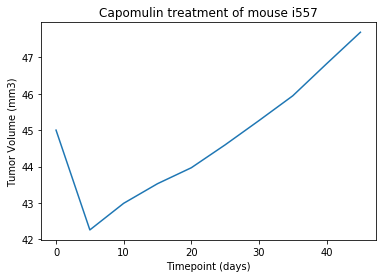

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = mouse_data.loc[(mouse_data['Drug Regimen'] == 'Capomulin')]
i557 = capomulin.loc[(capomulin['Mouse ID'] == 'i557')]
i557_tp = i557.set_index('Timepoint')
i557_tp[['Tumor Volume (mm3)']].plot.line(title='Capomulin treatment of mouse i557', legend=False)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

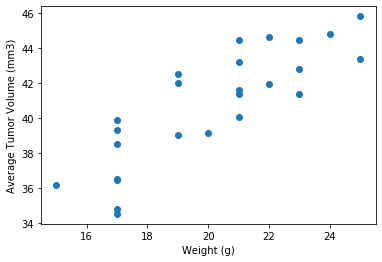

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_gb = capomulin.groupby('Mouse ID')
cap_df = cap_gb.mean()
x_value = cap_df['Weight (g)']
y_value = cap_df['Tumor Volume (mm3)']
plt.scatter(x_value, y_value)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

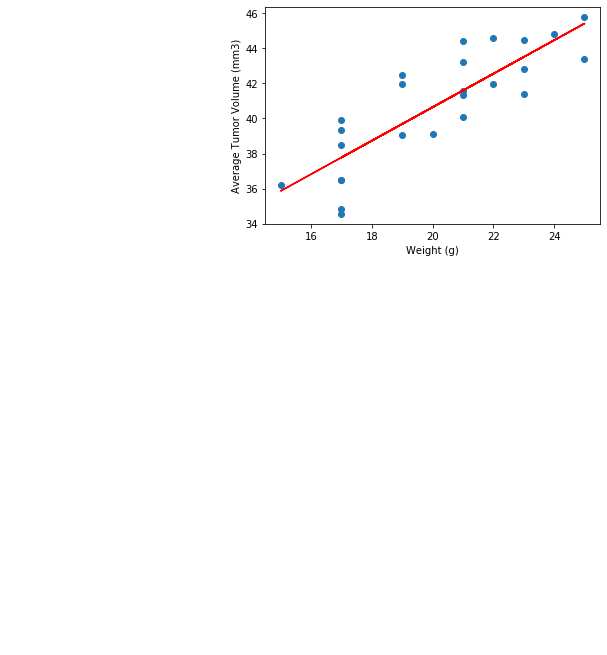

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, cap_df['Tumor Volume (mm3)'])
plt.plot(x_value,regress_values,'r-')
plt.annotate(line_eq,(6,10), fontsize=15, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()